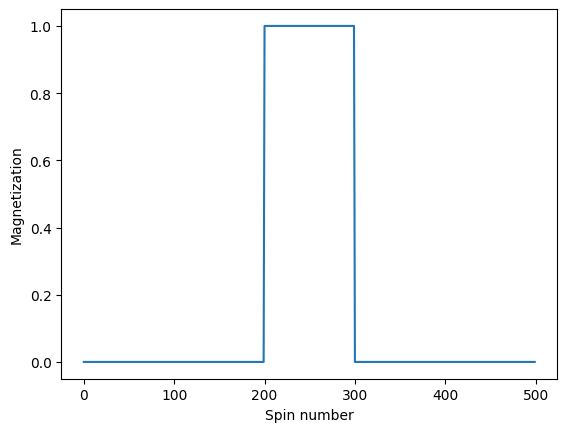

In [14]:
import numpy as np
from scipy.fft import fftshift, fft2
import matplotlib.pyplot as plt

N_spins = 500  # Number of spins in the phantom
# Create the phantom
# The phantom is rect pulse of size 100
phantom = np.zeros(N_spins, dtype=np.complex128)  # All spins start at zero
pulse_end = 200 + 100
phantom[200:pulse_end] = 1  # Set the pulse to the desired amplitude

# Plot the initial state of the phantom
plt.figure()
plt.plot(phantom.real)
plt.xlabel('Spin number')
plt.ylabel('Magnetization')
plt.show()

gamma = 42.58e6  # Gyromagnetic ratio for hydrogen in Hz/T
Gx = 1e-3  # Gradient strength in T/m
B0 = 1.0  # B0 field in T

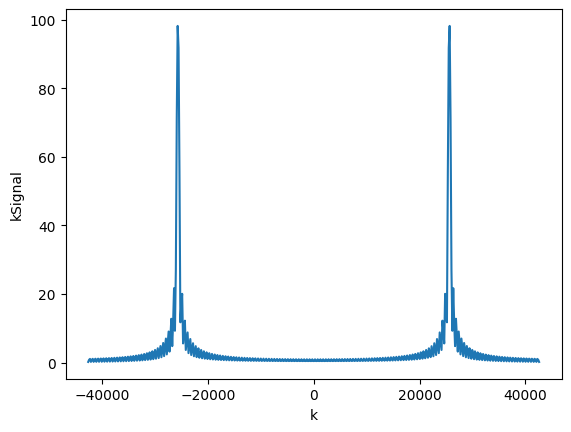

In [15]:
# RF pulse
angle = np.pi / 2  # 90 degree flip
phantom *= np.exp(1j * angle)  # Rotate each spin by 90 degrees

Gx_values = np.linspace(-Gx, Gx, N_spins)  # Gx field, non-uniform
kx = gamma * Gx_values  # k-space trajectory

k_signal = np.zeros_like(kx, dtype=np.complex128)
x_values = np.linspace(-N_spins / 2, N_spins / 2, N_spins)  # Assuming spins are evenly spaced
for i, k in enumerate(kx):
    k_signal[i] = np.sum(phantom * np.exp(-1j * 2 * np.pi * k * x_values))  # k-space signal is sum of all spins

# Plot the k-space signal
plt.figure()
plt.plot(kx, np.abs(k_signal))
plt.xlabel('k')
plt.ylabel('kSignal')
plt.show()

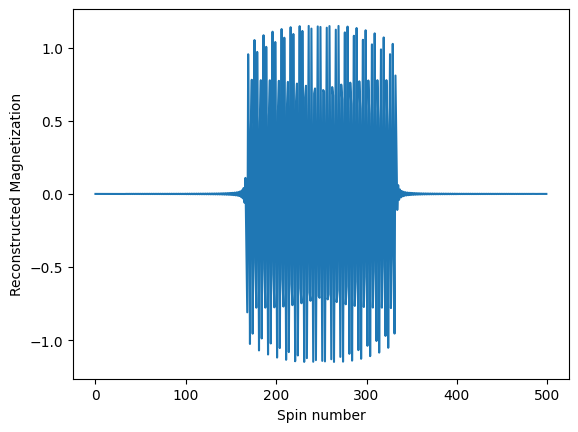

In [16]:
# Reconstruct the image with an inverse Fourier transform
reconstructed_phantom = np.fft.ifft(np.fft.ifftshift(k_signal))

# Plot the reconstructed phantom
plt.figure()
plt.plot(reconstructed_phantom.real)
plt.xlabel('Spin number')
plt.ylabel('Reconstructed Magnetization')
plt.show()